In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
war=pd.read_csv('russia_losses_equipment.csv')
war

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2023-10-25,609,320,324,5112,9697,7125,833,NaN,NaN,5372,20,554,1007.0,NaN,NaN,9474.0,1538.0,1.0
608,2023-10-26,610,320,324,5141,9715,7155,834,NaN,NaN,5389,20,556,1010.0,NaN,NaN,9507.0,1538.0,1.0
609,2023-10-27,611,320,324,5145,9726,7162,834,NaN,NaN,5390,20,556,1011.0,NaN,NaN,9513.0,1538.0,1.0
610,2023-10-28,612,320,324,5167,9749,7180,834,NaN,NaN,5399,20,558,1011.0,NaN,NaN,9524.0,1541.0,1.0


In [3]:
war.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
war.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
607,2023-10-25,609,320,324,5112,9697,7125,833,NaN,NaN,5372,20,554,1007.0,NaN,NaN,9474.0,1538.0,1.0
608,2023-10-26,610,320,324,5141,9715,7155,834,NaN,NaN,5389,20,556,1010.0,NaN,NaN,9507.0,1538.0,1.0
609,2023-10-27,611,320,324,5145,9726,7162,834,NaN,NaN,5390,20,556,1011.0,NaN,NaN,9513.0,1538.0,1.0
610,2023-10-28,612,320,324,5167,9749,7180,834,NaN,NaN,5399,20,558,1011.0,NaN,NaN,9524.0,1541.0,1.0
611,2023-10-29,613,320,324,5175,9758,7188,834,NaN,NaN,5399,20,558,1012.0,NaN,NaN,9532.0,1544.0,1.0


In [5]:
war.shape

(612, 19)

In [6]:
war.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       612 non-null    object 
 1   day                        612 non-null    int64  
 2   aircraft                   612 non-null    int64  
 3   helicopter                 612 non-null    int64  
 4   tank                       612 non-null    int64  
 5   APC                        612 non-null    int64  
 6   field artillery            612 non-null    int64  
 7   MRL                        612 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      612 non-null    int64  
 11  naval ship                 612 non-null    int64  
 12  anti-aircraft warfare      612 non-null    int64  
 13  special equipment          593 non-null    float64

In [9]:
war.isnull().sum()

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                547
fuel tank                    547
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           576
greatest losses direction    409
vehicles and fuel tanks       65
cruise missiles               65
submarines                   566
dtype: int64

In [11]:
c=war.drop(['date','submarines','cruise missiles','vehicles and fuel tanks','greatest losses direction','mobile SRBM system','special equipment','fuel tank','military auto'],axis=1)
c

,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare
0,2,10,7,80,516,49,4,0,2,0
1,3,27,26,146,706,49,4,2,2,0
2,4,27,26,150,706,50,4,2,2,0
3,5,29,29,150,816,74,21,3,2,5
4,6,29,29,198,846,77,24,3,2,7
...,...,...,...,...,...,...,...,...,...,...
607,609,320,324,5112,9697,7125,833,5372,20,554
608,610,320,324,5141,9715,7155,834,5389,20,556
609,611,320,324,5145,9726,7162,834,5390,20,556
610,612,320,324,5167,9749,7180,834,5399,20,558


In [13]:
correlation=c.corr()

<AxesSubplot:>

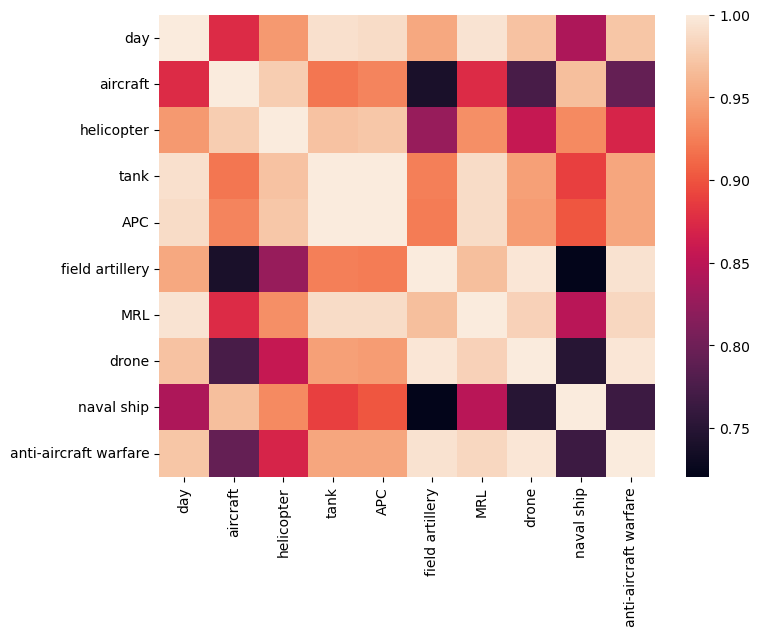

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(c.corr())

<AxesSubplot:xlabel='helicopter', ylabel='count'>

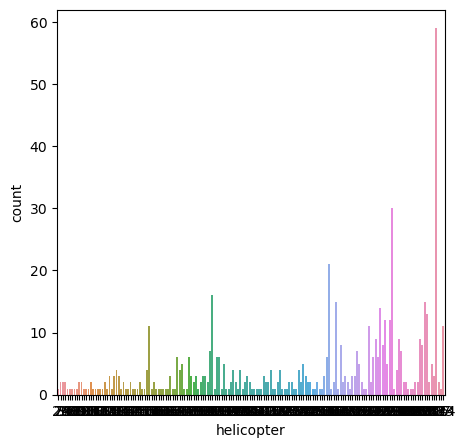

In [18]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="helicopter",data=c)

<AxesSubplot:xlabel='tank', ylabel='count'>

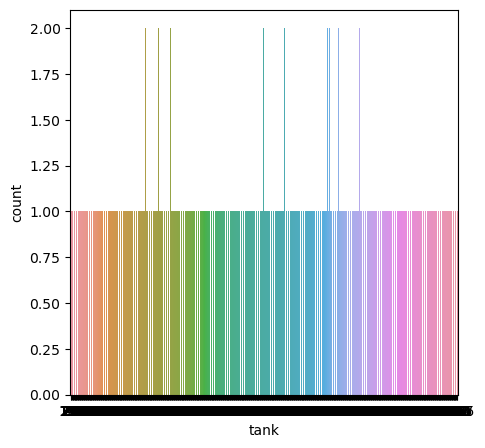

In [19]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="tank",data=c)

In [21]:
x=c.drop(['naval ship'],axis=1)
x

,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,anti-aircraft warfare
0,2,10,7,80,516,49,4,0,0
1,3,27,26,146,706,49,4,2,0
2,4,27,26,150,706,50,4,2,0
3,5,29,29,150,816,74,21,3,5
4,6,29,29,198,846,77,24,3,7
...,...,...,...,...,...,...,...,...,...
607,609,320,324,5112,9697,7125,833,5372,554
608,610,320,324,5141,9715,7155,834,5389,556
609,611,320,324,5145,9726,7162,834,5390,556
610,612,320,324,5167,9749,7180,834,5399,558


In [22]:
y=war['naval ship']
y

0       2
1       2
2       2
3       2
4       2
       ..
607    20
608    20
609    20
610    20
611    20
Name: naval ship, Length: 612, dtype: int64

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [24]:
x.shape,X_train.shape,X_test.shape

((612, 9), (550, 9), (62, 9))

In [25]:
fo=RandomForestRegressor()

In [26]:
fo.fit(X_train,y_train)
X_train_pred=fo.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

fo.fit(X_test,y_test)
X_test_pred=fo.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9998389950846532
accuracy score of test data: 0.9985546618498645


In [27]:
li=LinearRegression()

In [28]:
li.fit(X_train,y_train)
X_train_pred=li.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

li.fit(X_test,y_test)
X_test_pred=li.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9770989903274622
accuracy score of test data: 0.9836733441431066


In [29]:
tr=DecisionTreeRegressor()

In [30]:
tr.fit(X_train,y_train)
X_train_pred=tr.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tr.fit(X_test,y_test)
X_test_pred=tr.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [41]:
input_data=(30,115,125,561,1625,291,90,53,49)
input_data_as_np=np.asarray(input_data)
reshaped=input_data_as_np.reshape(1,-1)
prediction=li.predict(reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.18887488])

In [42]:
print('The amount of Naval Ship lost is ',prediction[0])

The amount of Naval Ship lost is  5.188874882800068
